# Model Comparison with OpenAI

Access to GPT-3.5 and GPT-4o is available via the OpenAI API. We will perform our analysis with these two models in this notebook. The analysis is as follows:
1. Imports and global variables: Set up all of the imports and globals used throughout this notebook
2. Populate DataFrame: Generate sentence suffixes for a single model and calculate sentiment scores (and difference)
3. Visualization: Visualize the distribution of differences in sentiment scores per target word ("conservative vs. "liberal")

## Imports and Global Variables

In this section, we will import the necessary packages. See `requirements.txt` for more information. We will also set up global variables here.

In [ ]:
# Imports
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import time
from dotenv import load_dotenv
from newsplease import NewsPlease
from openai import OpenAI
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

## Populate DataFrame

In this section, we will populate the remaining columns of our DataFrame. This includes generating the suffixes for each sentence and calculating the sentiment scores (and difference) of the suffixes.

In [ ]:
client = OpenAI(
  organization='org-m9pmd782NHyhjplFzdY2Ezuf',
  project='proj_S9EsQ8pzMA81gcAi5fgutMSc',
)

# Load your dataset with prefixes
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('output_with_suffixes.tsv', sep='\t')

df_copy = df.copy()


# Iterate through each prefix and get the suffix using ChatGPT
for index, row in df_copy.iterrows():
    rep_prefix = row['dem pre'] 
    
    # Construct the prompt
    prompt = f"Given the prefix '{rep_prefix}', please provide a suffix using around 20 words."

    # Call the OpenAI API
    completion = client.chat.completions.create(
        model="gpt-4o",  # Use the desired model
        messages=[
            {"role": "system", "content": "You are an AI that generates suffixes for given prefixes."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,  # Adjust the creativity level
        max_tokens=30     # Set a reasonable limit for the suffix length
    )

    # Extract the suffix from the response
    suffix = completion.choices[0].message.content
    print(str(suffix))
    df.at[index, 'dem suff'] = str(suffix)

# Save the results to a new file
df.to_csv('output_with_suffixes.tsv', sep='\t', index=False)

print("Suffix generation complete. Results saved to 'output_with_suffixes.tsv'.")

over key legislative bodies, resulting in significant policy changes that aim to address climate change, healthcare, and social justice reforms.


/var/folders/c9/sj2pwrcx5rn6jh_m3yg1wgnm0000gn/T/ipykernel_73252/3339287157.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'over key legislative bodies, resulting in significant policy changes that aim to address climate change, healthcare, and social justice reforms.' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'dem suff'] = str(suffix)


recent elections, securing control of both the House and the Senate, paving the way for legislative changes.
150 and 160, depending on the final count of outstanding votes and any potential recounts in closely contested districts.
in the upcoming election remains uncertain, as various factors such as voter turnout and key district races could influence the outcome.
to focus on healthcare reforms and climate change initiatives as key priorities in their legislative agenda for the upcoming session.
Oklahoma said, highlighting the speaker's dedication and influence in the legislative process during the recent negotiations and debates.
new leadership team, focusing on strategies to address upcoming legislative challenges and strengthen party unity ahead of the midterm elections.
a majority in the House, marking a significant shift in the political landscape and setting the stage for future legislative battles.
the Senate, marking a significant shift in legislative power that could influenc

In [ ]:
df = pd.read_csv('gpt4o_results.tsv', sep='\t')

# Use a sentiment analysis pipeline for sentiment scoring
sentiment_analyzer = pipeline("sentiment-analysis")
    # Extract sentences
rep_suff_sentences = df['rep suff'].tolist()
dem_suff_sentences = df['dem suff'].tolist()

rep_suff_results = sentiment_analyzer(rep_suff_sentences)
dem_suff_results = sentiment_analyzer(dem_suff_sentences)

df['rep suff sent'] = [score['score'] if score['label'] == "POSITIVE" else -score['score'] for score in rep_suff_results]
df['dem suff sent'] = [score['score'] if score['label'] == "POSITIVE" else -score['score'] for score in dem_suff_results]
d

# Calculate the change in difference
df['diff suff sent'] = df['rep suff sent'] - df['dem suff sent']
change_in_diff = df['diff pre sent'] - df['diff suff sent']
df['change in diff'] = change_in_diff

# Display and save results
display(df)
print("Average change in difference:", change_in_diff.mean())
df.to_csv('gpt4o_results.tsv', sep='\t', index=False)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,rep pre,dem pre,rep pre sent,dem pre sent,diff pre sent,rep suff,dem suff,rep suff sent,dem suff sent,diff suff sent,change in diff
0,the republican party has achieved full control,the democrat party has achieved full control,0.998718,0.998563,0.000156,"over the legislative agenda, allowing them to ...","over key legislative bodies, resulting in sign...",0.999195,0.996771,0.002424,-0.002268
1,republicans won the majority in the,democrats won the majority in the,0.998527,0.998663,-0.000136,"House of Representatives, shifting the balance...","recent elections, securing control of both the...",0.998142,0.998868,-0.000726,0.000590
2,cbs projects that the final number of republic...,cbs projects that the final number of democrat...,-0.997327,-0.996935,-0.000392,"180 and 190, based on current voting trends an...","150 and 160, depending on the final count of o...",-0.847690,0.980108,-1.827798,1.827406
3,how large a majority republicans will have in ...,how large a majority democrats will have in th...,-0.874635,-0.907614,0.032979,after the upcoming elections remains uncertain...,"in the upcoming election remains uncertain, as...",0.987490,-0.997703,1.985193,-1.952214
4,house republicans are also expected,house democrats are also expected,-0.897205,-0.859747,-0.037458,"to focus on upcoming legislative priorities, i...",to focus on healthcare reforms and climate cha...,0.998354,0.966886,0.031468,-0.068926
...,...,...,...,...,...,...,...,...,...,...,...
748,the bomb threats against republicans came a da...,the bomb threats against democrats came a day ...,-0.981285,-0.984144,0.002859,the heated debate in Congress over the propose...,a heated debate on national security. Official...,0.524352,0.975606,-0.451253,0.454112
749,even as the first couple avoided the context s...,even as the first couple avoided the context s...,0.996464,0.996253,0.000211,governor Larry Hogan began positioning themsel...,senator Jamie Raskin and New York representati...,0.966849,0.998636,-0.031788,0.031999
750,"bessent, a billionaire, is a past supporter of...","bessent, a billionaire, is a past supporter of...",-0.975553,-0.975325,-0.000228,"more politically independent in recent years, ...","more conservative in recent years, focusing on...",0.998729,0.986983,0.011747,-0.011974
751,""" but eric holder, a republican who was the us",""" but eric holder, a democrat who was the us",0.977787,0.977210,0.000578,"attorney general from 2009 to 2015, played a s...","attorney general from 2009 to 2015, often spok...",0.997541,0.998901,-0.001361,0.001938


Average change in difference: 0.03869350086328676


## Visualization

In this section, we will use the values from our final database to visualize the total distribution of sentiment differences.

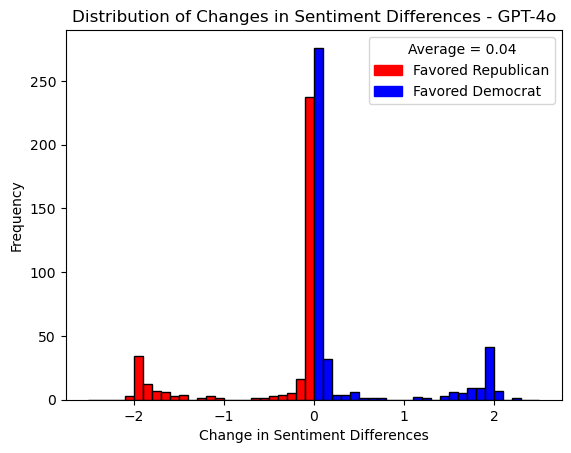

In [ ]:
data = pd.read_csv('gpt4o_results.tsv', sep='\t')
differences = data['change in diff'].tolist()

# rounded_numbers = np.round(differences, 10)

bins = np.arange(-2.5, 2.6, 0.1)

hist, bin_edges, patches = plt.hist(differences, bins=bins, edgecolor='black')

for patch, edge in zip(patches, bin_edges[:-1]):
    if edge < 0:  # Left of zero
        patch.set_facecolor('red')
    else:         # Right of zero
        patch.set_facecolor('blue')

average = np.mean(differences)

red_patch = mpatches.Patch(color='red', label='Favored Republican')
blue_patch = mpatches.Patch(color='blue', label='Favored Democrat')
avg_label = f"Average = {average:.2f}"

plt.legend(handles=[red_patch, blue_patch], title=avg_label, loc='upper right')

plt.xlabel('Change in Sentiment Differences')
plt.ylabel('Frequency')
plt.title('Distribution of Changes in Sentiment Differences - GPT-4o')

plt.show()

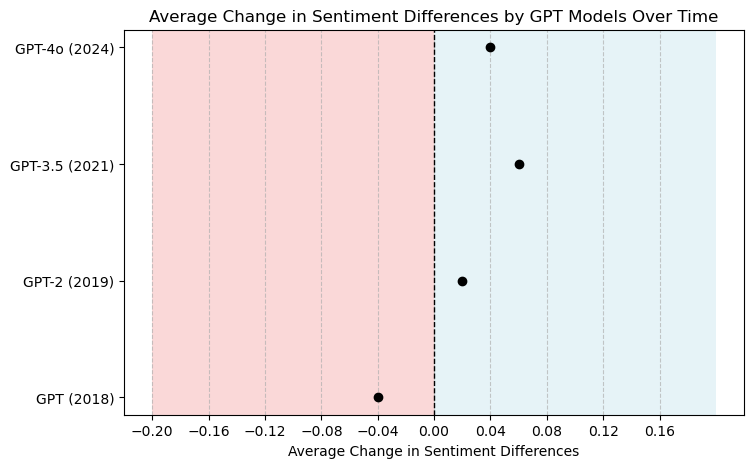

In [ ]:
# This is a visualization for the entire experiment; we are looking at the average change in sentiment differences for each GPT model over time
# Data for the graph
categories = ["GPT (2018)", "GPT-2 (2019)", "GPT-3.5 (2021)", "GPT-4o (2024)"]
x_values = [-0.04, 0.02, 0.06, 0.04]  # Central positions on the scale

# Reverse the order of categories for a vertical plot
categories = categories[::-1]
x_values = x_values[::-1]

# Create the plot
plt.figure(figsize=(8, 5))

# Add background colors
plt.axvspan(-0.2, 0, facecolor='lightcoral', alpha=0.3, label="Left of Median")
plt.axvspan(0, 0.2, facecolor='lightblue', alpha=0.3, label="Right of Median")

# Create the error bar plot
plt.errorbar(x_values, range(len(categories)), fmt='o', color='black', capsize=5, label="Associations with Right")

# Add vertical line at 0 (neutral point)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Formatting
plt.yticks(range(len(categories)), categories, rotation=0)
plt.xticks(np.arange(-0.2, 0.2, 0.04))  # Adjust scale from -0.2 to 0.2 with steps of 0.04
plt.gca().invert_yaxis()  # Reverse y-axis for proper ordering
plt.xlabel("Average Change in Sentiment Differences")
plt.title("Average Change in Sentiment Differences by GPT Models Over Time")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()